In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from hubbard import Hubbard
from tqdm import tqdm
from datetime import datetime

# Parameters
size = 6  # Lattice size (6x6 grid)
num_electrons = size ** 2  # Half-filling
t = 1.0  # Hopping parameter
u_values = np.logspace(-2, 2, 50)  # Range of U values (logarithmic scale)
repeats = 1500  # Number of realizations for averaging
equilibration_steps = 100  # Steps to let the lattice equilibrate

# Initialize results container
double_occupancy_results = []

# Loop over U values
for u in tqdm(u_values, desc="Processing u values"):
    avg_double_occupancy = 0

    for _ in range(repeats):
        # Initialize the Hubbard model in antiferromagnetic configuration
        hubbard = Hubbard(size=size, u=u, t=t, num_electrons=num_electrons)
        hubbard.initialize_af()

        # Perform equilibration steps
        for _ in range(equilibration_steps):
            hubbard.simulate_step()

        # Calculate double occupancy directly
        avg_double_occupancy += hubbard.total_paired / num_electrons

    # Average over realizations
    avg_double_occupancy /= repeats
    double_occupancy_results.append(avg_double_occupancy)


timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

NameError: name 'timestamp' is not defined

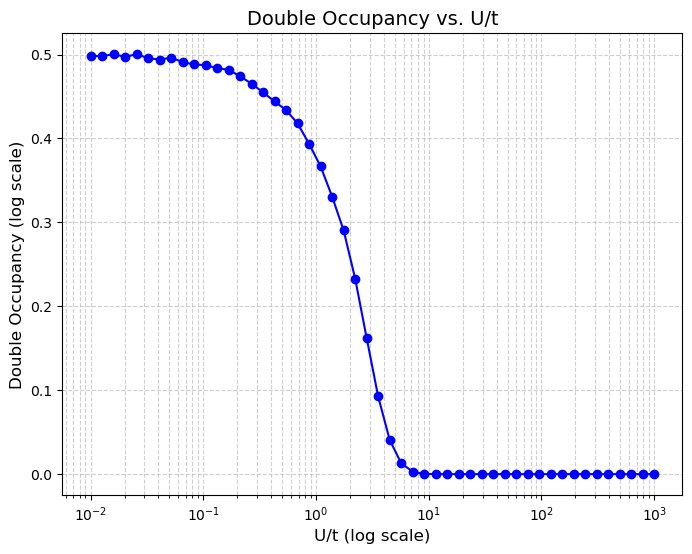

In [3]:
# Plot results
plt.figure(figsize=(8, 6))
plt.plot(u_values / t, double_occupancy_results, marker='o', linestyle='-', color='b', label='Double Occupancy')
plt.title("Double Occupancy vs. U/t", fontsize=14)
plt.xscale("log")  # Logarithmic scale for U/t
#plt.yscale("log")  # Logarithmic scale for Double Occupancy
plt.xlabel("U/t (log scale)", fontsize=12)
plt.ylabel("Double Occupancy (log scale)", fontsize=12)
plt.grid(True, which="both", linestyle='--', alpha=0.6)
plt.savefig(f"DoubleOccupancyDim{size}Rep{repeats}Steps{equilibration_steps}_{timestamp}.png")
plt.legend()
plt.show()